# Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path

import numpy as np
import pandas as pd
import astropy.units as u

from matplotlib import pyplot as plt

In [2]:
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
Ne_Sy_bib = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results_bib.tbl', format='ascii')

In [4]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

Ne_Sy1_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy1']
Ne_Sy2_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='Sy2']
Ne_SyG_bib = Ne_Sy_bib[Ne_Sy_bib['otype']=='SyG']

In [23]:
Ne_Sy2

Main_id,RA,DEC,otype,redshift,[NeV]/[NeII],[NeV]/[NeII]_err,[NeV]/[NeIII],[NeV]/[NeIII]_err,[NeIII]/[NeII],[NeIII]/[NeII]_err,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,best.reduced_chi_square,log_[NeV]/[NeII],log_[NeV]/[NeIII],log_[NeIII]/[NeII],log_bayes.agn.fracAGN
str25,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2MASX J00215355-7910077,5.47314754327,-79.16889600056,Sy2,0.072724,1.987075928917609,nan,0.8785714285714286,nan,2.261712439418417,nan,0.8284035522037789,0.0527380807086683,61.714289959163246,3.812500887934251,2.817290371277146,0.2982144624192799,-0.0562229242388401,0.3544373866581201,-0.08175804751495366
2MASX J10181928+3722419,154.58017544017,37.37842791621,Sy2,0.04932,1.9146482122260668,0.46739783580631533,1.129251700680272,0.2385736666800438,1.6955017301038062,0.3688426653048256,0.28486713604313796,0.13132567650006002,77.03968262861692,10.204587865002665,1.0847995966483033,0.2820889905638448,0.05279075329187897,0.2292982372719658,-0.5453576506495186
2MASX J22041914+0333511,331.07985144241997,3.56423713312,Sy2,0.0611,1.4,nan,0.5907801418439717,nan,2.369747899159664,nan,0.7888344401301369,0.07284298138830146,65.87099542222523,6.100776197285325,2.128556127706078,0.146128035678238,-0.2285741112485923,0.37470214692683035,-0.1030141365658835
3C 343,248.6408614245833,62.75997083888889,Sy2,0.987997,1.1857142857142857,0.21893964677420275,0.5842754367934224,nan,1.9857142857142858,0.31570716190530224,0.5890909275047436,0.061755924926304946,71.66283679388697,5.005499771212819,2.261643488072811,0.07398005236181707,-0.2333823712445983,0.29791676023983826,-0.22981766571243226
ESO 253-3,81.32524166666667,-46.00593333333333,Sy2,0.042489,0.425625,0.021612523552709113,0.37833333333333335,0.019164796831318977,1.125,0.03557699616676484,0.6200862295707624,0.03612203617197497,60.14549387964595,1.219147696248245,1.6120310220552458,-0.37097287074313967,-0.4221253931905209,0.05115252244738129,-0.20754791304562353
ESO 428-14,109.13002590105002,-29.324689673990008,Sy2,0.005554,1.234251968503937,nan,0.4761513525598033,nan,2.795275590551181,nan,0.6964692548675148,0.04913274769212552,89.5388556128872,2.1066713871316116,2.501937977680827,0.0914038285467972,-0.32225497767130556,0.4464246320991372,-0.1570980504332644
FRL 49,279.24263995131,-59.40230064619999,Sy2,0.020020516993793088,0.679306653491436,0.0468167240841779,0.5723061415298312,0.036291445984571694,1.1870882740447959,0.05556099189449628,0.5611537403112127,0.07090009071284598,59.48828262354388,2.345034023071609,1.762246666779604,-0.16793413167680576,-0.24237159356705254,0.07448301508358265,-0.25091813799229273
IC 1065,222.33996964047,63.27049985979999,Sy2,0.04168,0.3421686746987952,0.037521080505244685,0.16473317865429235,0.017914476288301662,2.07710843373494,0.20317401731092388,0.22701843707743286,0.12067824853188748,20.106488843558736,14.302439790854116,2.9725697984161297,-0.4657597523290362,-0.7832189214416563,0.3174591691126201,-0.6439388705785182
ICRF J015002.6-072548,27.51123991483,-7.4301260200999995,Sy2,0.017665554481694132,0.4656934306569343,nan,0.6412060301507537,nan,0.734184914841849,nan,0.8831773445740818,0.03659933741264085,89.99474807821643,0.23018328617459322,3.1347262463669114,-0.33189988843524443,-0.19300240202456315,-0.13419454310668247,-0.05395208007304875


### [NeV]/[NeII]

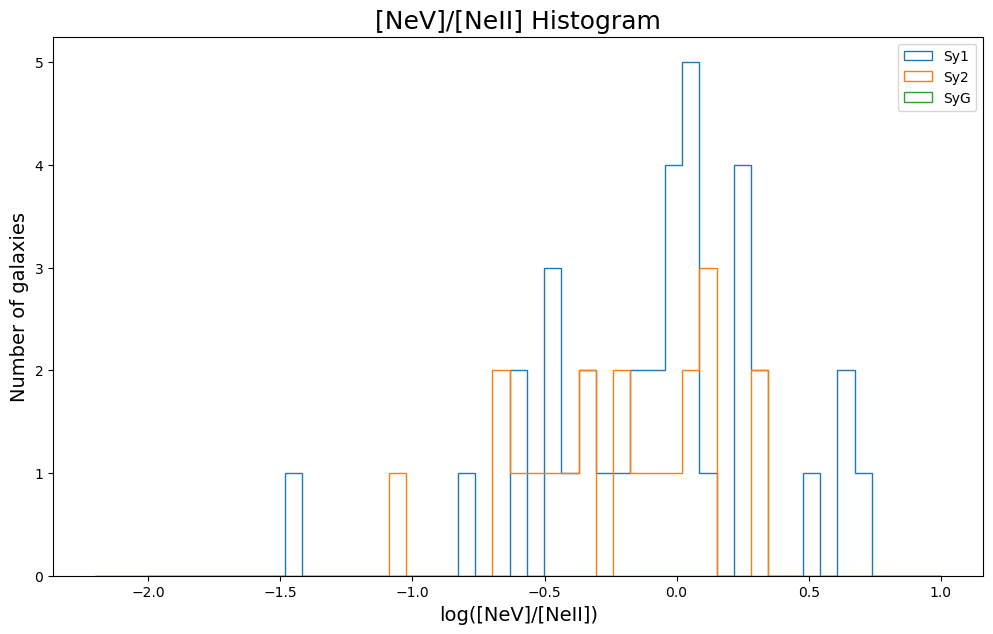

In [6]:
x_NeV_NeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
x_NeV_NeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
x_NeV_NeII_SyG = np.log10(Ne_SyG['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeII_SyG = np.linspace(-2.,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1, bins=bins_NeV_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2, bins=bins_NeV_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG, bins=bins_NeV_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

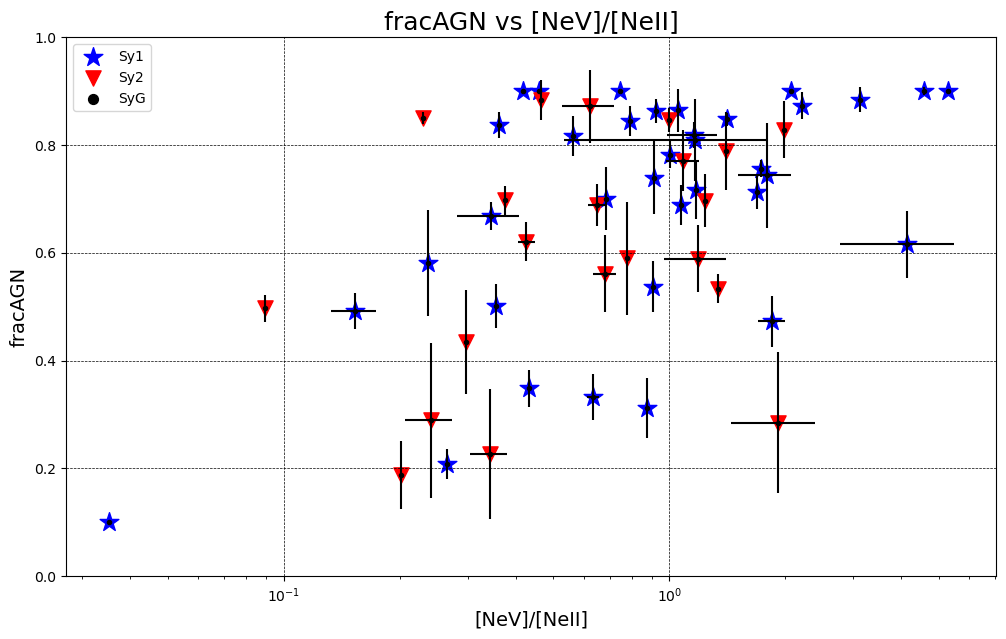

In [7]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy.jpg')

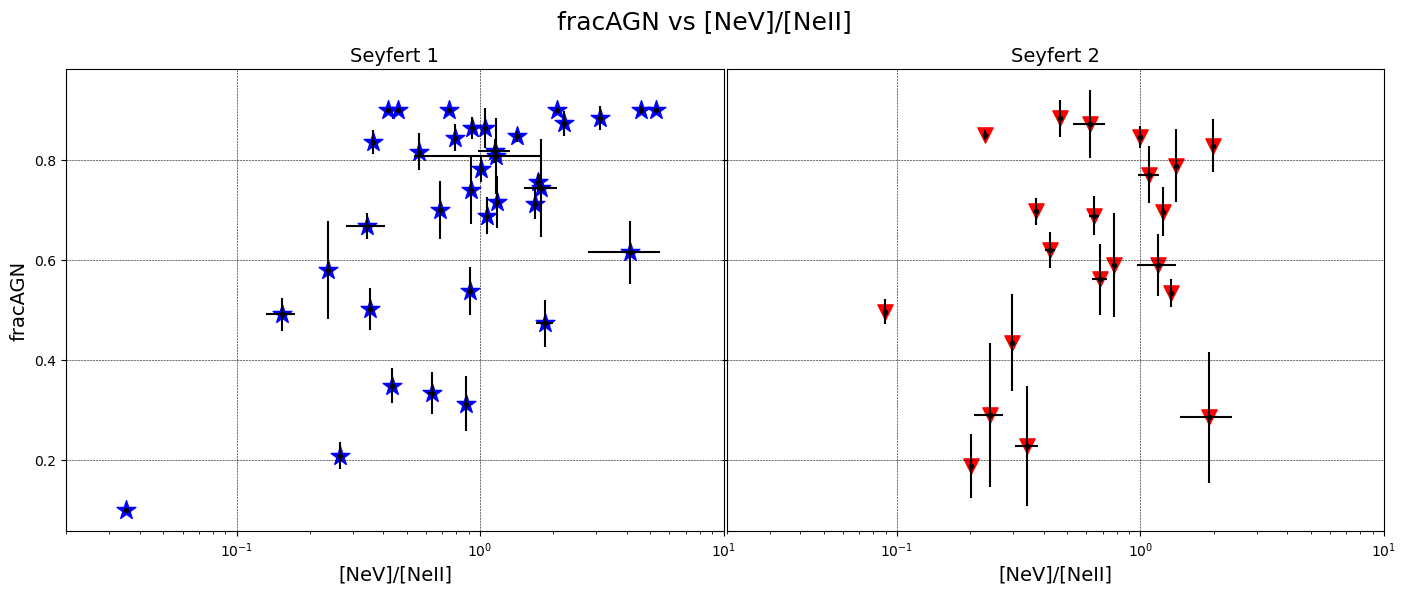

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xlim(20e-3,10e0) #ax1.set_xlim(20e-4,10e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xlim(20e-3,10e0)#ax2.set_xlim(20e-4,10e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeV]/[NeIII]

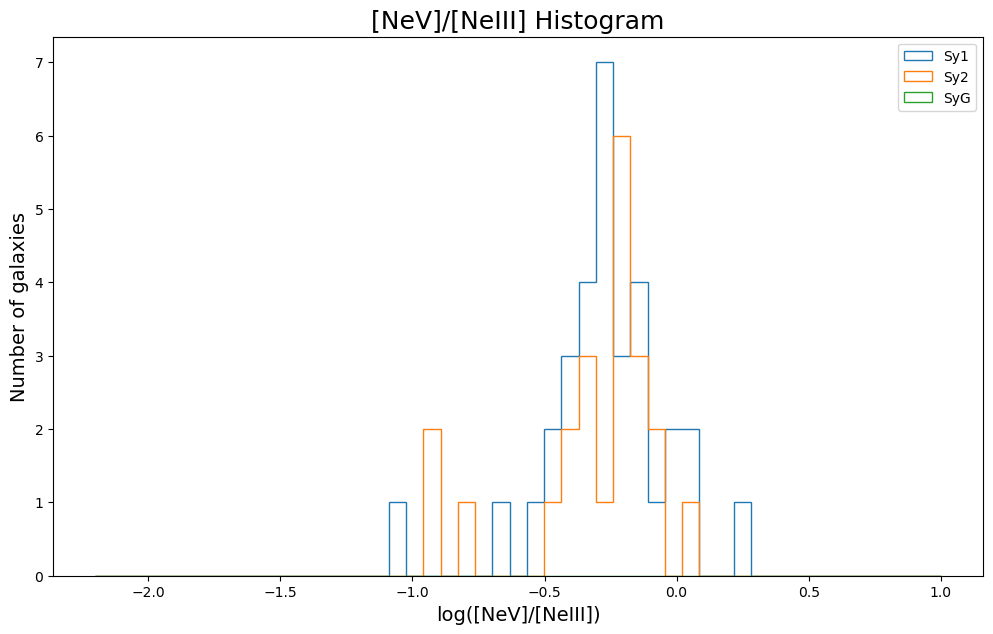

In [9]:
x_NeV_NeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
x_NeV_NeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
x_NeV_NeIII_SyG = np.log10(Ne_SyG['[NeV]/[NeIII]'])
bins_NeV_NeIII_Sy1 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_Sy2 = np.linspace(-2.2,1,50)
bins_NeV_NeIII_SyG = np.linspace(-2.2,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeIII_Sy1, bins=bins_NeV_NeIII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeV_NeIII_Sy2, bins=bins_NeV_NeIII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeV_NeIII_SyG, bins=bins_NeV_NeIII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeIII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeIII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

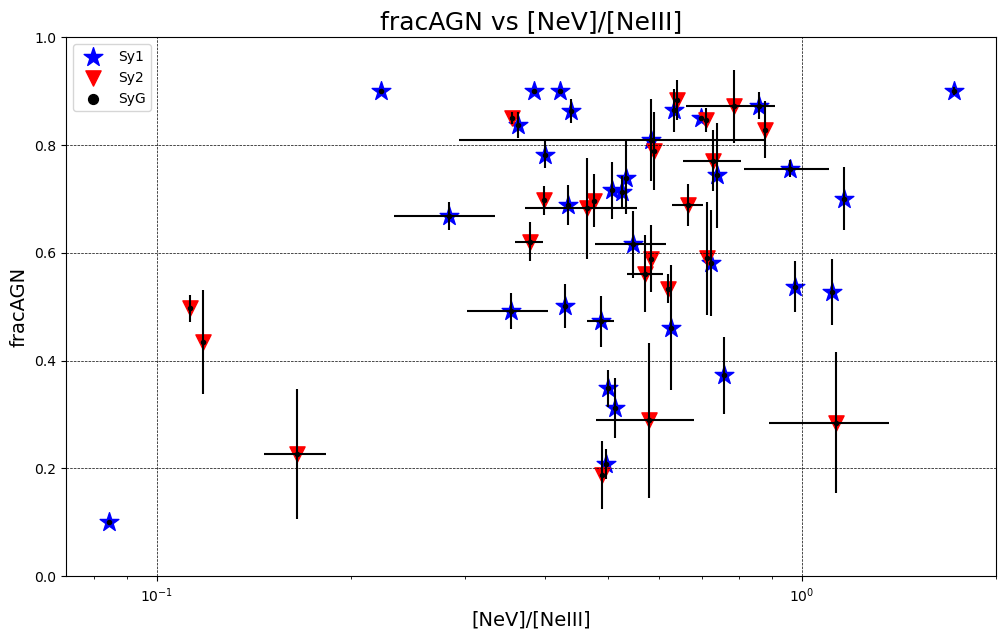

In [10]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeV]/[NeIII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeV]/[NeIII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeIII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy.jpg')

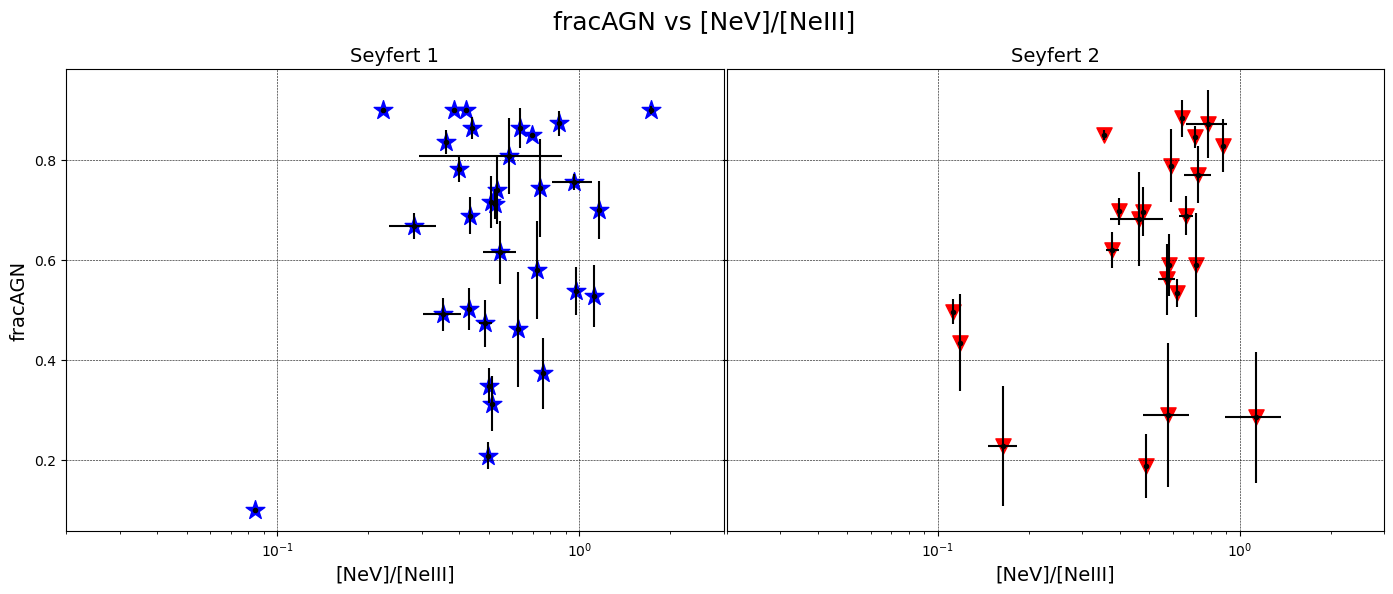

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeIII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeV]/[NeIII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeV]/[NeIII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeV]/[NeIII]_err'], fmt='k.')
ax1.set_xlim(20e-3,3e0)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeV]/[NeIII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeV]/[NeIII]_err'], fmt='k.')
ax2.set_xlim(20e-3,3e0)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeIII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

### [NeIII]/[NeII]

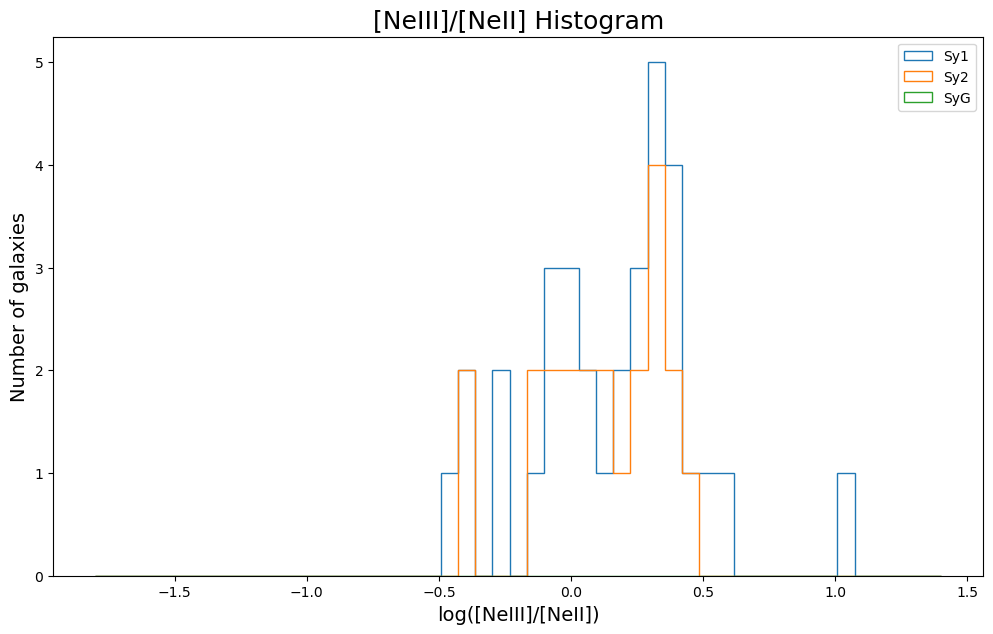

In [12]:
x_NeIII_NeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
x_NeIII_NeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
x_NeIII_NeII_SyG = np.log10(Ne_SyG['[NeIII]/[NeII]'])
bins_NeIII_NeII_Sy1 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_Sy2 = np.linspace(-1.8,1.4,50)
bins_NeIII_NeII_SyG = np.linspace(-1.8,1.4,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeIII_NeII_Sy1, bins=bins_NeIII_NeII_Sy1, histtype='step', label='Sy1')
plt.hist(x_NeIII_NeII_Sy2, bins=bins_NeIII_NeII_Sy2, histtype='step', label='Sy2')
plt.hist(x_NeIII_NeII_SyG, bins=bins_NeIII_NeII_SyG, histtype='step', label='SyG')
plt.xlabel('log([NeIII]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeIII]/[NeII] Histogram', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

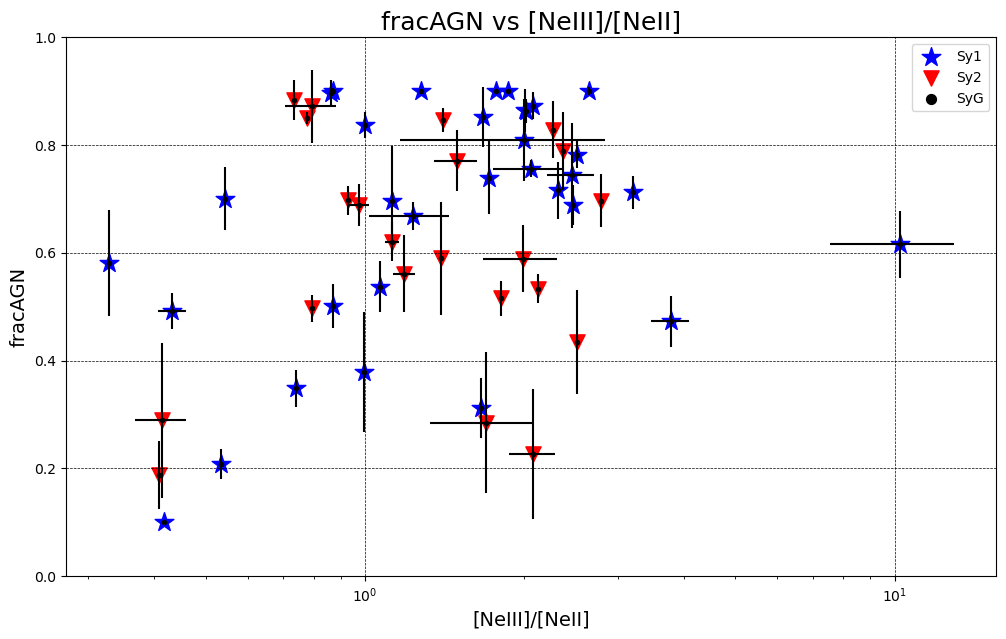

In [13]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG['[NeIII]/[NeII]'], Ne_SyG['bayes.agn.fracAGN'],\
             Ne_SyG['bayes.agn.fracAGN_err'], Ne_SyG['[NeIII]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeIII]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy.jpg')

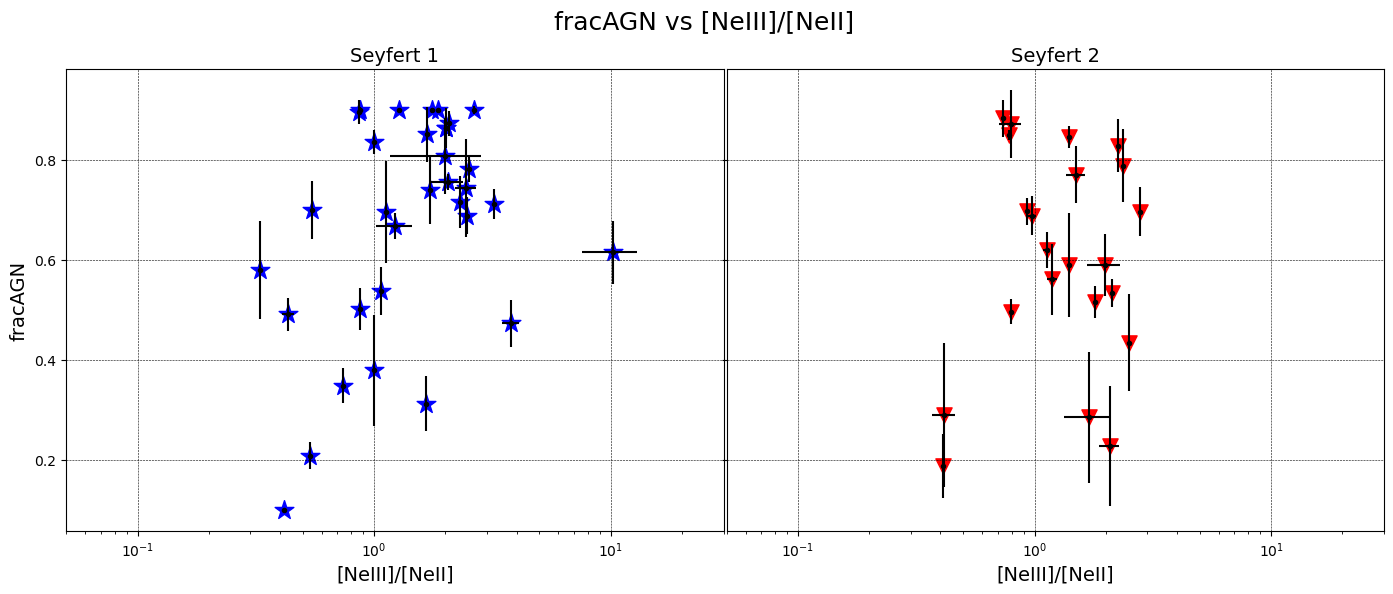

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeIII]/[NeII]', fontsize=18)
ax1.scatter(Ne_Sy1['[NeIII]/[NeII]'],Ne_Sy1['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['[NeIII]/[NeII]'], Ne_Sy1['bayes.agn.fracAGN'],\
             Ne_Sy1['bayes.agn.fracAGN_err'], Ne_Sy1['[NeIII]/[NeII]_err'], fmt='k.')
ax1.set_xlim(50e-3,3e1)
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
#ax1.set_yscale("log")
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['[NeIII]/[NeII]'], Ne_Sy2['bayes.agn.fracAGN'],\
             Ne_Sy2['bayes.agn.fracAGN_err'], Ne_Sy2['[NeIII]/[NeII]_err'], fmt='k.')
ax2.set_xlim(50e-3,3e1)
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeIII]/[NeII]', fontsize=14)
#ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Graphics of Ne Line Ratios Histograms and Ne Line Ratios vs fracAGN but now by bibcode in each galaxy

### [NeV]/[NeII]

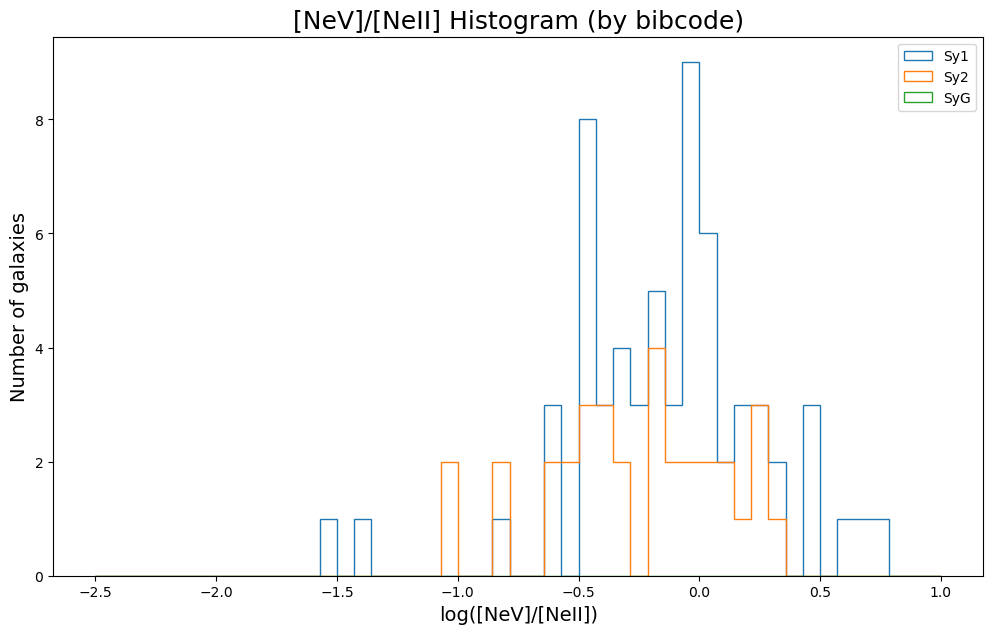

In [15]:
x_NeV_NeII_Sy1_bib = np.log10(Ne_Sy1_bib['[NeV]/[NeII]'])
x_NeV_NeII_Sy2_bib = np.log10(Ne_Sy2_bib['[NeV]/[NeII]'])
x_NeV_NeII_SyG_bib = np.log10(Ne_SyG_bib['[NeV]/[NeII]'])
bins_NeV_NeII_Sy1_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_Sy2_bib = np.linspace(-2.5,1,50)
bins_NeV_NeII_SyG_bib = np.linspace(-2.5,1,50)
plt.figure(figsize=(12,7))
plt.hist(x_NeV_NeII_Sy1_bib, bins=bins_NeV_NeII_Sy1_bib, histtype='step', label='Sy1')
plt.hist(x_NeV_NeII_Sy2_bib, bins=bins_NeV_NeII_Sy2_bib, histtype='step', label='Sy2')
plt.hist(x_NeV_NeII_SyG_bib, bins=bins_NeV_NeII_SyG_bib, histtype='step', label='SyG')
plt.xlabel('log([NeV]/[NeII])',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.title('[NeV]/[NeII] Histogram (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeII_Sy_bib.jpg')

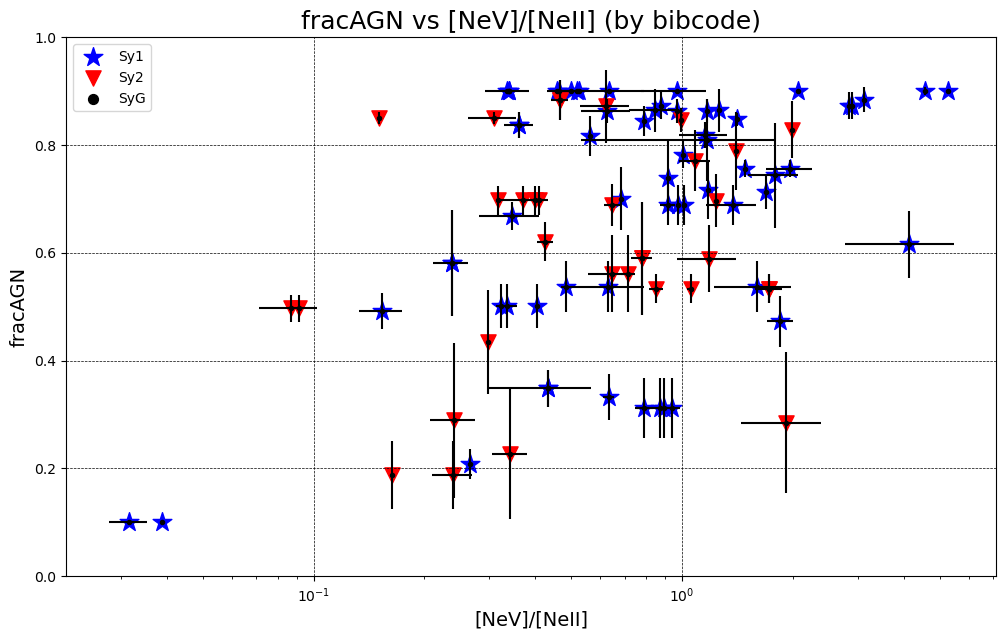

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*',label='Sy1')
plt.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v', label='Sy2')
plt.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.scatter(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],200, color='black', marker = '.', label='SyG')
plt.errorbar(Ne_SyG_bib['[NeV]/[NeII]'], Ne_SyG_bib['bayes.agn.fracAGN'],\
             Ne_SyG_bib['bayes.agn.fracAGN_err'], Ne_SyG_bib['[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'[NeV]/[NeII]', fontsize=14)
plt.xscale('log')
plt.ylabel(r'fracAGN', fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.title(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy_bib.jpg')

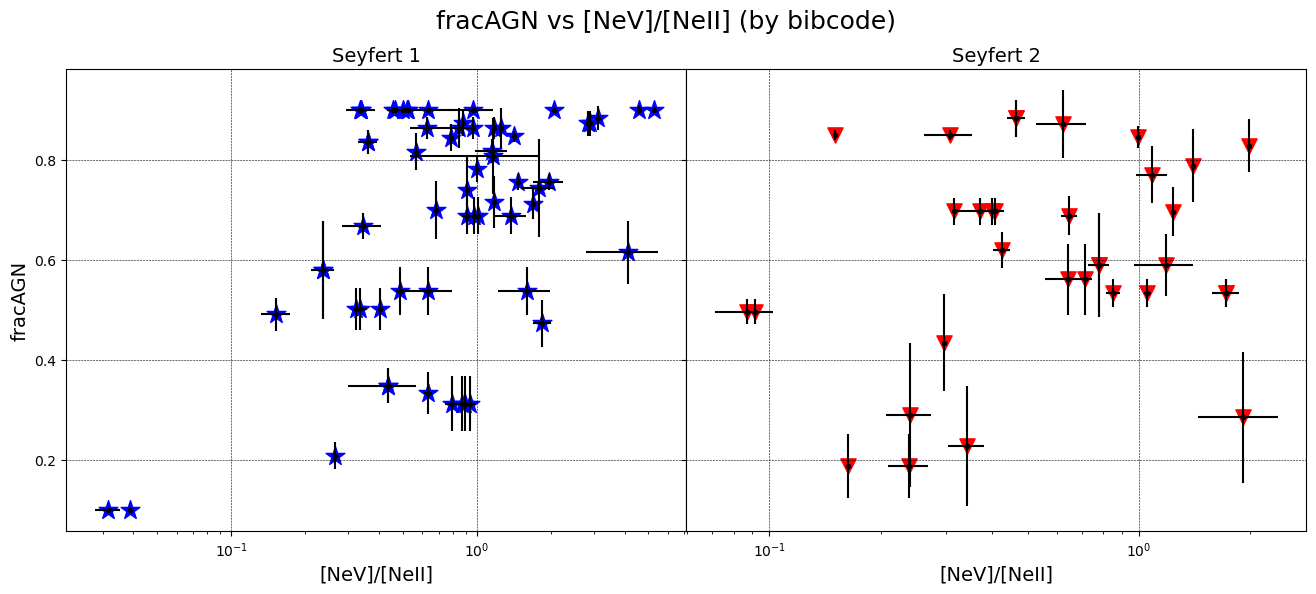

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6),sharey=True)
fig.suptitle(r'fracAGN vs [NeV]/[NeII] (by bibcode)', fontsize=18)
ax1.scatter(Ne_Sy1_bib['[NeV]/[NeII]'],Ne_Sy1_bib['bayes.agn.fracAGN'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1_bib['[NeV]/[NeII]'], Ne_Sy1_bib['bayes.agn.fracAGN'],\
             Ne_Sy1_bib['bayes.agn.fracAGN_err'], Ne_Sy1_bib['[NeV]/[NeII]_err'], fmt='k.')
ax1.set_xscale("log")
ax1.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_ylabel(r'fracAGN', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2_bib['[NeV]/[NeII]'], Ne_Sy2_bib['bayes.agn.fracAGN'],\
             Ne_Sy2_bib['bayes.agn.fracAGN_err'], Ne_Sy2_bib['[NeV]/[NeII]_err'], fmt='k.')
ax2.set_xscale("log")
ax2.set_xlabel(r'[NeV]/[NeII]', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2_bib.jpg')

## Correlations

In [18]:
#Seyfert 1
log_NeVNeII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeII]'])
log_NeVNeIII_Sy1 = np.log10(Ne_Sy1['[NeV]/[NeIII]'])
log_NeIIINeII_Sy1 = np.log10(Ne_Sy1['[NeIII]/[NeII]'])
log_fracAGN_Sy1 = np.log10(Ne_Sy1['bayes.agn.fracAGN'])

Ne_Sy1['log_[NeV]/[NeII]'] = log_NeVNeII_Sy1
Ne_Sy1['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy1
Ne_Sy1['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy1
Ne_Sy1['log_bayes.agn.fracAGN'] = log_fracAGN_Sy1

#Seyfert 2
log_NeVNeII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeII]'])
log_NeVNeIII_Sy2 = np.log10(Ne_Sy2['[NeV]/[NeIII]'])
log_NeIIINeII_Sy2 = np.log10(Ne_Sy2['[NeIII]/[NeII]'])
log_fracAGN_Sy2 = np.log10(Ne_Sy2['bayes.agn.fracAGN'])

Ne_Sy2['log_[NeV]/[NeII]'] = log_NeVNeII_Sy2
Ne_Sy2['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy2
Ne_Sy2['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy2
Ne_Sy2['log_bayes.agn.fracAGN'] = log_fracAGN_Sy2

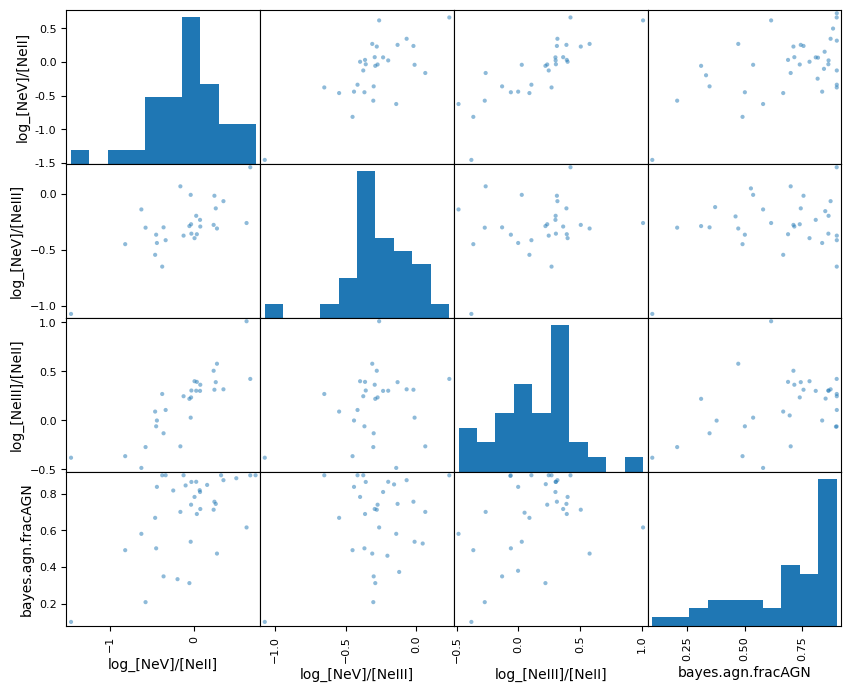

In [19]:
df_Ne_Sy1 = Ne_Sy1.to_pandas()
df_Ne_Sy2 = Ne_Sy2.to_pandas()

attributes=['log_[NeV]/[NeII]', 'log_[NeV]/[NeIII]', 'log_[NeIII]/[NeII]', 'bayes.agn.fracAGN']
scatMatrix_Sy1=pd.plotting.scatter_matrix(df_Ne_Sy1[attributes], figsize=(10,8))

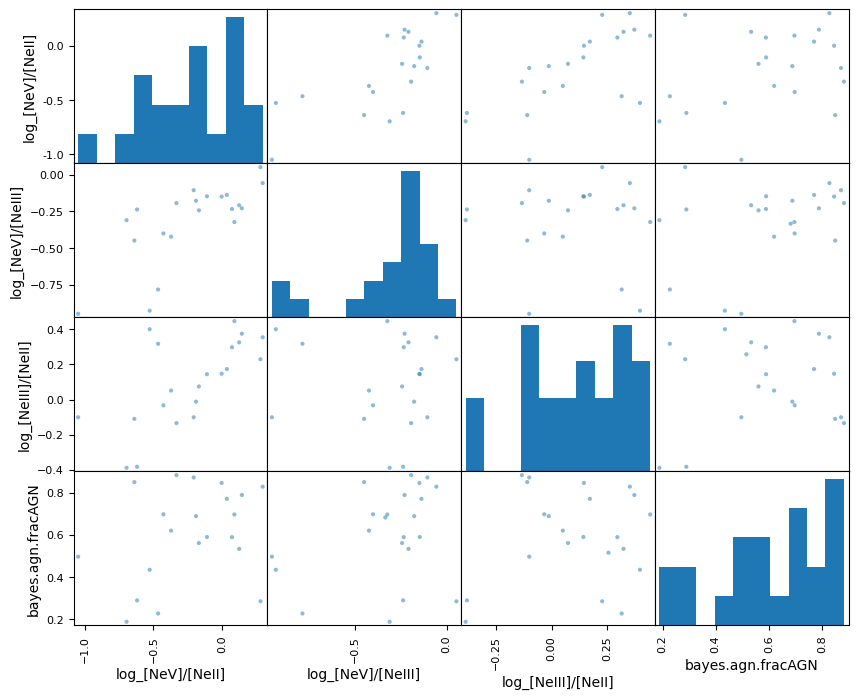

In [20]:
scatMatrix_Sy2=pd.plotting.scatter_matrix(df_Ne_Sy2[attributes], figsize=(10,8))

In [21]:
conc_corr_Sy1 = df_Ne_Sy1.corr()['bayes.agn.fracAGN']
conc_corr_Sy1

RA                         0.068528
DEC                       -0.068632
redshift                  -0.255544
[NeV]/[NeII]               0.373903
[NeV]/[NeII]_err           0.280590
[NeV]/[NeIII]              0.198484
[NeV]/[NeIII]_err          0.836348
[NeIII]/[NeII]             0.133716
[NeIII]/[NeII]_err         0.048453
bayes.agn.fracAGN          1.000000
bayes.agn.fracAGN_err     -0.380967
bayes.agn.i                0.022164
bayes.agn.i_err           -0.199797
best.reduced_chi_square    0.087451
log_[NeV]/[NeII]           0.567232
log_[NeV]/[NeIII]          0.267401
log_[NeIII]/[NeII]         0.396135
log_bayes.agn.fracAGN      0.957782
Name: bayes.agn.fracAGN, dtype: float64

In [22]:
conc_corr_Sy2 = df_Ne_Sy2.corr()['bayes.agn.fracAGN']
conc_corr_Sy2

RA                        -0.254647
DEC                       -0.473828
redshift                  -0.044738
[NeV]/[NeII]               0.219506
[NeV]/[NeII]_err          -0.262867
[NeV]/[NeIII]              0.233187
[NeV]/[NeIII]_err         -0.183131
[NeIII]/[NeII]             0.030055
[NeIII]/[NeII]_err        -0.383359
bayes.agn.fracAGN          1.000000
bayes.agn.fracAGN_err     -0.590182
bayes.agn.i                0.215803
bayes.agn.i_err           -0.621158
best.reduced_chi_square    0.391899
log_[NeV]/[NeII]           0.331875
log_[NeV]/[NeIII]          0.330577
log_[NeIII]/[NeII]         0.128542
log_bayes.agn.fracAGN      0.977854
Name: bayes.agn.fracAGN, dtype: float64

## Notebook Info

In [23]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.4.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-47-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

pandas    : 1.4.3
numpy     : 1.21.5
matplotlib: 3.5.1
astropy   : 5.1

Watermark: 2.3.1



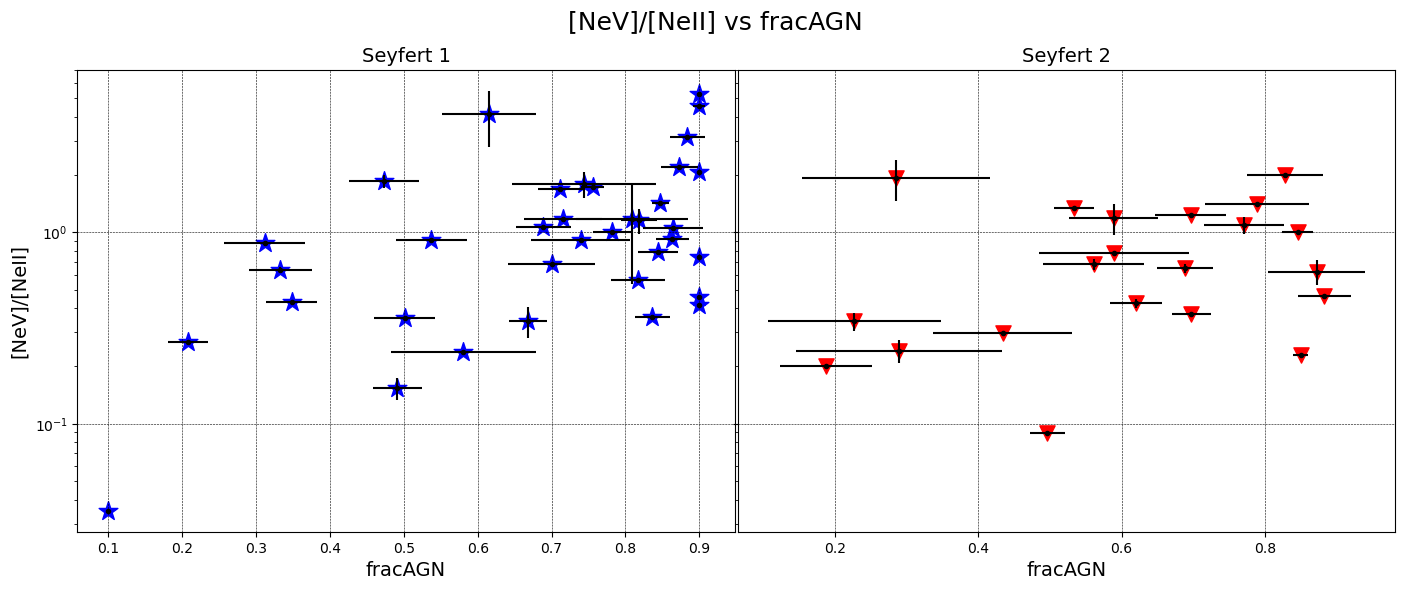

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
fig.suptitle(r'[NeV]/[NeII] vs fracAGN', fontsize=18)
ax1.scatter(Ne_Sy1['bayes.agn.fracAGN'],Ne_Sy1['[NeV]/[NeII]'],200,color='blue',marker = '*')
ax1.errorbar(Ne_Sy1['bayes.agn.fracAGN'], Ne_Sy1['[NeV]/[NeII]'],\
             Ne_Sy1['[NeV]/[NeII]_err'], Ne_Sy1['bayes.agn.fracAGN_err'], fmt='k.')
#ax1.set_xlim(20e-4,10e0)
#ax1.set_xscale("log")
ax1.set_xlabel(r'fracAGN', fontsize=14)
ax1.set_yscale("log")
ax1.set_ylabel(r'[NeV]/[NeII]', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['[NeV]/[NeII]'], 120, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['bayes.agn.fracAGN'], Ne_Sy2['[NeV]/[NeII]'], \
             Ne_Sy2['[NeV]/[NeII]_err'], Ne_Sy2['bayes.agn.fracAGN_err'], fmt='k.')
#ax2.set_xlim(20e-4,10e0)
#ax2.set_xscale("log")
ax2.set_xlabel(r'fracAGN', fontsize=14)
ax2.set_yscale("log")
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots